In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import re
from sklearn.metrics import roc_curve, auc
from sklearn import ensemble, preprocessing, metrics


In [4]:
df=pd.read_csv('dataset/table4.csv') # 載入資料

In [ ]:
df.columns

In [5]:
df_10k = df[df.loc[:,'user']<5001]
df_10k.shape

(108588, 34)

In [6]:
len(df_10k.loc[:,'user'].unique())

5000

In [7]:
df_10k.to_csv('tb4_10k.csv',index = False)

In [8]:
# df_10k=pd.read_csv('dataset/table3_10k.csv')

In [9]:
df_10k.shape

(108588, 34)

In [10]:
df_10k.head(5)

,user,adgroup_id,pid,cate_id,campaign_id,customer,price,cms_segid,cms_group_id,final_gender_code,...,pv_3,cart_3,fav_3,buy_3,brand_New,user_ad_pid,cnt_clk,cnt_nonclk,cnt_percentage_total,click_or_not
16,1029,715052,430539_1007,1665,353703,164557,299.0,92,11,1,...,22,0,0,0,999999999,1029_715052_430539_1007,0,1,0.0,0
209,3829,218591,430548_1007,6736,275364,34256,169.0,0,2,2,...,0,0,0,0,999999999,3829_218591_430548_1007,0,1,0.0,0
235,4418,735368,430539_1007,6300,118727,9197,333.0,34,4,2,...,6,0,0,0,422876,4418_735368_430539_1007,0,1,0.0,0
682,2483,102655,430548_1007,9713,189503,185484,24.0,0,4,2,...,16,0,0,0,999999999,2483_102655_430548_1007,0,1,0.0,0
1216,167,502180,430548_1007,8111,107738,51598,258.0,7,2,2,...,30,0,0,0,21837,167_502180_430548_1007,0,1,0.0,0


In [11]:
df_10k.isnull().any()

user                    False
adgroup_id              False
pid                     False
cate_id                 False
campaign_id             False
customer                False
price                   False
cms_segid               False
cms_group_id            False
final_gender_code       False
age_level               False
pvalue_level            False
shopping_level          False
occupation              False
new_user_class_level    False
user_cate               False
pv_1                    False
cart_1                  False
fav_1                   False
buy_1                   False
pv_2                    False
cart_2                  False
fav_2                   False
buy_2                   False
pv_3                    False
cart_3                  False
fav_3                   False
buy_3                   False
brand_New               False
user_ad_pid             False
cnt_clk                 False
cnt_nonclk              False
cnt_percentage_total    False
click_or_n

In [12]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108588 entries, 16 to 23241904
Data columns (total 34 columns):
user                    108588 non-null int64
adgroup_id              108588 non-null int64
pid                     108588 non-null object
cate_id                 108588 non-null int64
campaign_id             108588 non-null int64
customer                108588 non-null int64
price                   108588 non-null float64
cms_segid               108588 non-null int64
cms_group_id            108588 non-null int64
final_gender_code       108588 non-null int64
age_level               108588 non-null int64
pvalue_level            108588 non-null int64
shopping_level          108588 non-null int64
occupation              108588 non-null int64
new_user_class_level    108588 non-null int64
user_cate               108588 non-null object
pv_1                    108588 non-null int64
cart_1                  108588 non-null int64
fav_1                   108588 non-null int64
buy_1   

In [13]:
df_10k.columns

Index(['user', 'adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer',
       'price', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level',
       'user_cate', 'pv_1', 'cart_1', 'fav_1', 'buy_1', 'pv_2', 'cart_2',
       'fav_2', 'buy_2', 'pv_3', 'cart_3', 'fav_3', 'buy_3', 'brand_New',
       'user_ad_pid', 'cnt_clk', 'cnt_nonclk', 'cnt_percentage_total',
       'click_or_not'],
      dtype='object')

## 整理表格

In [14]:
df_10k = df_10k.drop('user_cate', axis = 1)
df_10k = df_10k.drop('user_ad_pid', axis = 1)
df_10k = df_10k.drop('cnt_percentage_total', axis = 1)
df_10k = df_10k.drop('cnt_clk', axis = 1)
df_10k = df_10k.drop('cnt_nonclk', axis = 1)

In [15]:
to_Obj =['user', 'adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer',
       'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level',
       'brand_New', 'click_or_not']
for col in to_Obj:
    df_10k[col]=df_10k[col].astype(str)


In [16]:
to_int8 =['pv_1', 'cart_1',
       'fav_1', 'buy_1', 'pv_2', 'cart_2', 'fav_2', 'buy_2', 'pv_3', 'cart_3',
       'fav_3', 'buy_3']
for col in to_int8:
    df_10k[col]=df_10k[col].astype(np.int8)


In [17]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108588 entries, 16 to 23241904
Data columns (total 29 columns):
user                    108588 non-null object
adgroup_id              108588 non-null object
pid                     108588 non-null object
cate_id                 108588 non-null object
campaign_id             108588 non-null object
customer                108588 non-null object
price                   108588 non-null float64
cms_segid               108588 non-null object
cms_group_id            108588 non-null object
final_gender_code       108588 non-null object
age_level               108588 non-null object
pvalue_level            108588 non-null object
shopping_level          108588 non-null object
occupation              108588 non-null object
new_user_class_level    108588 non-null object
pv_1                    108588 non-null int8
cart_1                  108588 non-null int8
fav_1                   108588 non-null int8
buy_1                   108588 non-null int8


### split to train/test/val

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_10k.head(5)

,user,adgroup_id,pid,cate_id,campaign_id,customer,price,cms_segid,cms_group_id,final_gender_code,...,pv_2,cart_2,fav_2,buy_2,pv_3,cart_3,fav_3,buy_3,brand_New,click_or_not
16,1029,715052,430539_1007,1665,353703,164557,299.0,92,11,1,...,35,0,0,0,22,0,0,0,999999999,0
209,3829,218591,430548_1007,6736,275364,34256,169.0,0,2,2,...,0,0,0,0,0,0,0,0,999999999,0
235,4418,735368,430539_1007,6300,118727,9197,333.0,34,4,2,...,10,0,0,0,6,0,0,0,422876,0
682,2483,102655,430548_1007,9713,189503,185484,24.0,0,4,2,...,0,0,0,0,16,0,0,0,999999999,0
1216,167,502180,430548_1007,8111,107738,51598,258.0,7,2,2,...,17,0,0,0,30,0,0,0,21837,0


In [20]:
#split 'target' in df_train & df_test
x = df_10k.drop('click_or_not', axis = 1).values
y = df_10k['click_or_not'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)
divtest_x, val_x, divtest_y, val_y = train_test_split(test_x, test_y, test_size=0.5)

In [22]:
df_10k_t1 = df_10k.drop('adgroup_id', axis = 1)
df_10k_t1 = df_10k.drop('pid', axis = 1)
df_10k_t1 = df_10k.drop('pvalue_level', axis = 1)
df_10k_t1 = df_10k.drop('user', axis = 1)


x1 = df_10k_t1.drop('click_or_not', axis = 1).values
y1 = df_10k_t1['click_or_not'].values

train1_x, test1_x, train1_y, test1_y = train_test_split(x1, y1, test_size=0.3)
divtest1_x, val1_x, divtest1_y, val1_y = train_test_split(test1_x, test1_y, test_size=0.5)

### Decision Tree

In [23]:
from sklearn import tree
from sklearn.metrics import classification_report

In [24]:
%%time
clf=tree.DecisionTreeClassifier(class_weight="balanced",criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
model=clf.fit(train_x,train_y)

Wall time: 1.18 s


In [25]:
%%time
trainPredY=model.predict(train_x)
testPredY=model.predict(divtest_x)
valPredY=model.predict(val_x)

print( classification_report(train_y,trainPredY) )
print( classification_report(divtest_y,testPredY) )
print( classification_report(val_y,valPredY) )

             precision    recall  f1-score   support

          0       0.96      0.53      0.69     71770
          1       0.08      0.67      0.14      4241

avg / total       0.92      0.54      0.66     76011

             precision    recall  f1-score   support

          0       0.96      0.52      0.68     15387
          1       0.07      0.61      0.13       901

avg / total       0.91      0.53      0.65     16288

             precision    recall  f1-score   support

          0       0.96      0.52      0.68     15332
          1       0.08      0.64      0.14       957

avg / total       0.91      0.53      0.65     16289

Wall time: 1.52 s


# Random Forest

In [27]:
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble.forest import RandomForestClassifier

## param1: max_depth=5

In [28]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
model=clf.fit(train_x,train_y)

In [29]:
model.oob_score_

0.49227085553406746

In [30]:
%%time
trainPredY=model.predict(train_x)
testPredY=model.predict(divtest_x)
valPredY=model.predict(val_x)

print( classification_report(train_y,trainPredY) )
print( classification_report(divtest_y,testPredY) )
print( classification_report(val_y,valPredY) )

             precision    recall  f1-score   support

          0       0.97      0.48      0.64     71770
          1       0.08      0.71      0.14      4241

avg / total       0.92      0.50      0.62     76011

             precision    recall  f1-score   support

          0       0.96      0.47      0.63     15387
          1       0.07      0.65      0.12       901

avg / total       0.91      0.48      0.61     16288

             precision    recall  f1-score   support

          0       0.96      0.48      0.64     15332
          1       0.08      0.68      0.14       957

avg / total       0.91      0.49      0.61     16289

Wall time: 2.37 s


#### feature importance

In [31]:
model.feature_importances_

array([2.95212429e-02, 4.14430860e-02, 8.37830480e-04, 2.48860335e-02,
       1.59164838e-02, 1.44382557e-02, 7.59366755e-02, 9.55114130e-03,
       8.72683299e-03, 2.94955746e-03, 8.10391194e-03, 5.06819831e-03,
       4.05763314e-03, 9.69363720e-04, 6.06167940e-03, 4.31733632e-02,
       7.04245925e-03, 9.01059938e-03, 0.00000000e+00, 6.36034339e-02,
       1.03043635e-02, 2.82623345e-02, 1.22012440e-04, 4.01817906e-01,
       5.74215359e-02, 9.05877558e-02, 1.02197624e-02, 2.99665471e-02])

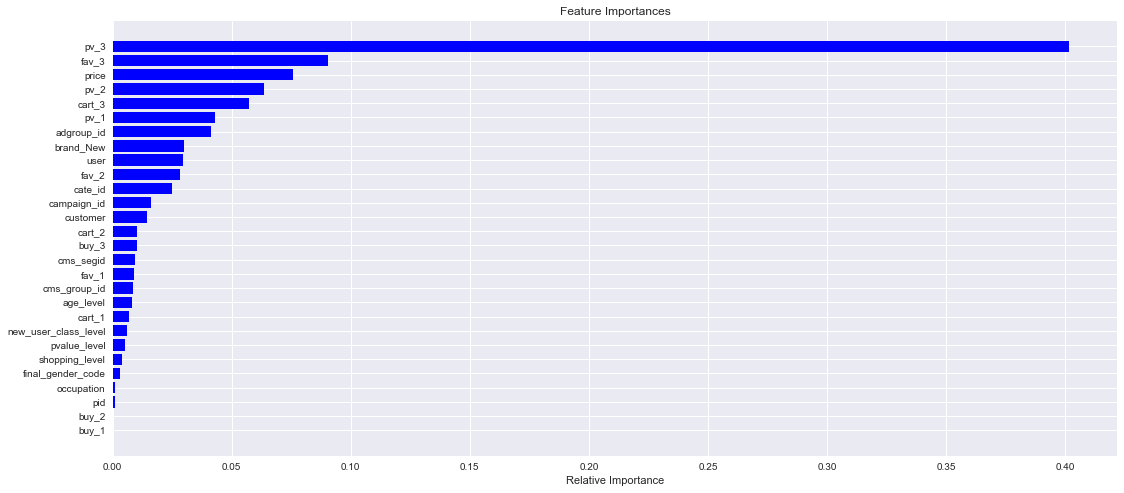

In [32]:
features = df_10k.drop('click_or_not', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

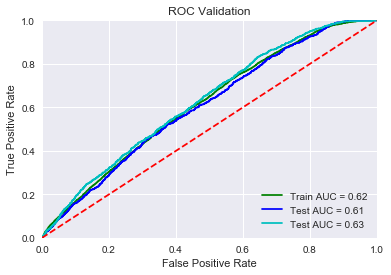

In [33]:
train_y_ture = np.array(train_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)

test_y_ture = np.array(divtest_y)
test_y_pred = model.predict_proba(divtest_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

val_y_ture = np.array(val_y)
val_y_pred = model.predict_proba(val_x)[:,1]
val_fpr, val_tpr, val_thresholds = metrics.roc_curve(val_y_ture, val_y_pred, pos_label='1')
val_auc = metrics.auc(val_fpr, val_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'g',label='Train AUC = %0.2f'%train_auc)
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)
plt.plot(val_fpr,val_tpr,'c',label='Test AUC = %0.2f'%val_auc)


plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## param 2: n_estimators

In [34]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [35]:
model=clf.fit(train_x,train_y)
trainPredY=model.predict(train_x)
testPredY=model.predict(test_x)

test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

print('  test_auc:',test_auc)
print('  odel.oob_score_ :',model.oob_score_)
print( classification_report(train_y,trainPredY) )
print( classification_report(test_y,testPredY) )

  test_auc: 0.6252642489995164
  odel.oob_score_ : 0.526844798779124
             precision    recall  f1-score   support

          0       0.97      0.52      0.68     71770
          1       0.08      0.71      0.14      4241

avg / total       0.92      0.53      0.65     76011

             precision    recall  f1-score   support

          0       0.96      0.52      0.67     30719
          1       0.07      0.64      0.13      1858

avg / total       0.91      0.52      0.64     32577



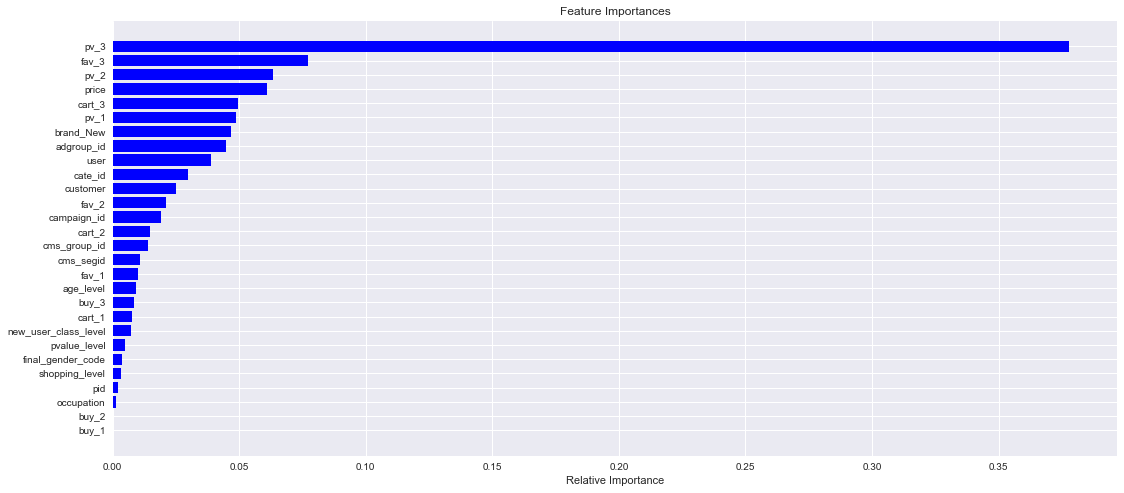

In [36]:
features = df_10k.drop('click_or_not', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

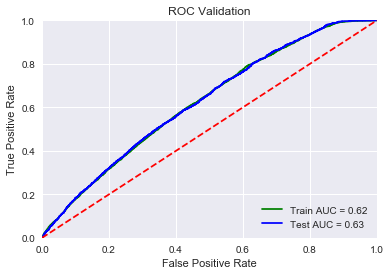

In [37]:
train_y_ture = np.array(train_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)

test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy',max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=105,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [ ]:
param_grid = { 
    'n_estimators': [150, 200],
    'max_depth' : [4,5,6,7,8],
    
}

In [ ]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_x, train_y)

In [ ]:
CV_rfc.best_params_

## param3

In [ ]:
# n_estimators =[150,250,200,250]
# for i in n_estimators:
#     clf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
#                 criterion='entropy', max_depth=5, max_features='auto',
#                 max_leaf_nodes=None, min_impurity_decrease=0.0,
#                 min_impurity_split=None, min_samples_leaf=50,
#                 min_samples_split=2, min_weight_fraction_leaf=0.0,
#                 n_estimators=i, n_jobs=1, oob_score=True, random_state=1,
#                 verbose=0, warm_start=False)

#     model=clf.fit(train_x,train_y)
#     trainPredY=model.predict(train_x)
#     testPredY=model.predict(test_x)
#     test_y_ture = np.array(test_y)
#     test_y_pred = model.predict_proba(test_x)[:,1]
#     test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
#     test_auc = metrics.auc(test_fpr, test_tpr)

#     print('max_depth -------------------->', i)
#     print('  test_auc:',test_auc)
#     print('model.oob_score_ :',model.oob_score_)
# #     print( classification_report(train_y,trainPredY) )
#     print( classification_report(test_y,testPredY) )

In [38]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=250,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [39]:
model=clf.fit(train_x,train_y)
trainPredY=model.predict(train_x)
testPredY=model.predict(test_x)

test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

print('  test_auc:',test_auc)
print('  model.oob_score_ :',model.oob_score_)
print( classification_report(train_y,trainPredY) )
print( classification_report(test_y,testPredY) )

  test_auc: 0.6277028876389898
  model.oob_score_ : 0.5359092762889581
             precision    recall  f1-score   support

          0       0.97      0.53      0.69     71770
          1       0.08      0.71      0.15      4241

avg / total       0.92      0.54      0.66     76011

             precision    recall  f1-score   support

          0       0.96      0.53      0.68     30719
          1       0.08      0.65      0.14      1858

avg / total       0.91      0.53      0.65     32577



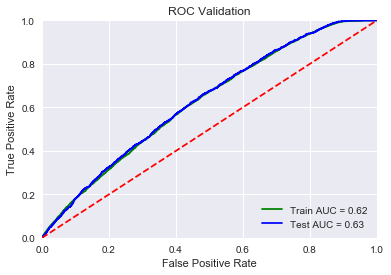

In [40]:
train_y_ture = np.array(train_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)


test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

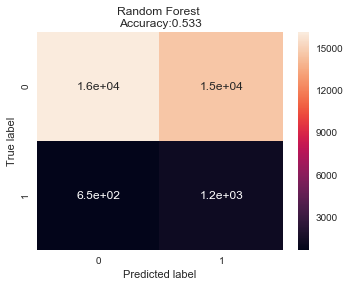

In [48]:
# Creates a confusion matrix
cm = confusion_matrix(test_y, testPredY) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(test_y, testPredY)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
model.feature_importances_

# test1

In [ ]:
# n_estimators =[150,250,200,250]
# for i in n_estimators:
#     clf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
#                 criterion='entropy', max_depth=5, max_features='auto',
#                 max_leaf_nodes=None, min_impurity_decrease=0.0,
#                 min_impurity_split=None, min_samples_leaf=50,
#                 min_samples_split=2, min_weight_fraction_leaf=0.0,
#                 n_estimators=i, n_jobs=1, oob_score=True, random_state=1,
#                 verbose=0, warm_start=False)

#     model=clf.fit(train_x,train_y)
#     trainPredY=model.predict(train_x)
#     testPredY=model.predict(test_x)
#     test_y_ture = np.array(test_y)
#     test_y_pred = model.predict_proba(test_x)[:,1]
#     test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
#     test_auc = metrics.auc(test_fpr, test_tpr)

#     print('max_depth -------------------->', i)
#     print('  test_auc:',test_auc)
#     print('model.oob_score_ :',model.oob_score_)
# #     print( classification_report(train_y,trainPredY) )
#     print( classification_report(test_y,testPredY) )

In [58]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [59]:
model=clf.fit(train1_x,train1_y)
trainPredY=model.predict(train1_x)
testPredY=model.predict(test1_x)

test_y_ture = np.array(test1_y)
test_y_pred = model.predict_proba(test1_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

print('  test_auc:',test_auc)
print('  model.oob_score_ :',model.oob_score_)
print( classification_report(train_y,trainPredY) )
print( classification_report(test_y,testPredY) )

  test_auc: 0.6248019526144633
  model.oob_score_ : 0.5221086421702122
             precision    recall  f1-score   support

          0       0.94      0.50      0.66     71770
          1       0.06      0.50      0.10      4241

avg / total       0.90      0.50      0.63     76011

             precision    recall  f1-score   support

          0       0.94      0.50      0.66     30719
          1       0.06      0.49      0.10      1858

avg / total       0.89      0.50      0.62     32577



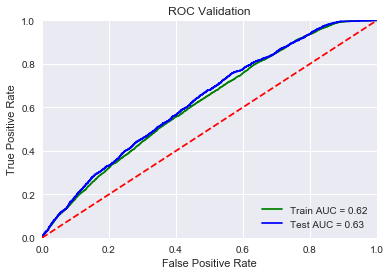

In [54]:
train_y_ture = np.array(train1_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)


test_y_ture = np.array(test1_y)
test_y_pred = model.predict_proba(test1_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

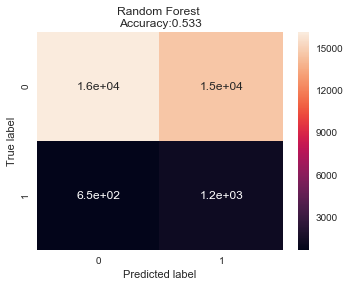

In [48]:
# Creates a confusion matrix
cm = confusion_matrix(test_y, testPredY) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(test_y, testPredY)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
model.feature_importances_